In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import ElasticNetCV
from sklearn import cross_validation
import numpy as np
from sklearn import metrics
from FeatureWeights import FeatureWeights
from sklearn.pipeline import Pipeline
import os
import cvxpy as cvx

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 29 days


In [2]:
df = pd.read_table("../data/AG/notrim/ag-cleaned_L6.txt")
print df.shape

(9792, 2381)


/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2871: DtypeWarning: Columns (0,71,116,159,250) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.iloc[:,466:].head()

,HMP_SITE,k__Archaea;p__Crenarchaeota,k__Archaea;p__Euryarchaeota,k__Archaea;p__[Parvarchaeota],k__Bacteria;p__,k__Bacteria;p__AD3,k__Bacteria;p__Acidobacteria,k__Bacteria;p__Actinobacteria,k__Bacteria;p__AncK6,k__Bacteria;p__Aquificae,...,k__Bacteria;p__WS3;c__PRR-12;o__Sediment-1;f__PRR-10;g__,k__Bacteria;p__WS4;c__;o__;f__;g__,k__Bacteria;p__ZB3;c__;o__;f__;g__,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__CM44,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__Deinococcus,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__B-42,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__Truepera,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae;g__Meiothermus,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae;g__Thermus
0,FECAL,0.0,0.000000,0.0,0.0,0.0,0.000000,0.001755,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FECAL,0.0,0.000000,0.0,0.0,0.0,0.000000,0.001911,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FECAL,0.0,0.000000,0.0,0.0,0.0,0.000000,0.218124,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SKIN,0.0,0.000000,0.0,0.0,0.0,0.000781,0.642207,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FECAL,0.0,0.000066,0.0,0.0,0.0,0.000000,0.051438,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_rel = df[df["HMP_SITE"] == "FECAL"]
print df_rel.shape

(8724, 2381)


In [5]:
df_rel.iloc[:,466:].head()

,HMP_SITE,k__Archaea;p__Crenarchaeota,k__Archaea;p__Euryarchaeota,k__Archaea;p__[Parvarchaeota],k__Bacteria;p__,k__Bacteria;p__AD3,k__Bacteria;p__Acidobacteria,k__Bacteria;p__Actinobacteria,k__Bacteria;p__AncK6,k__Bacteria;p__Aquificae,...,k__Bacteria;p__WS3;c__PRR-12;o__Sediment-1;f__PRR-10;g__,k__Bacteria;p__WS4;c__;o__;f__;g__,k__Bacteria;p__ZB3;c__;o__;f__;g__,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__CM44,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Deinococcaceae;g__Deinococcus,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__B-42,k__Bacteria;p__[Thermi];c__Deinococci;o__Deinococcales;f__Trueperaceae;g__Truepera,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae;g__Meiothermus,k__Bacteria;p__[Thermi];c__Deinococci;o__Thermales;f__Thermaceae;g__Thermus
0,FECAL,0.0,0.000000,0.0,0.0,0.0,0.0,0.001755,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FECAL,0.0,0.000000,0.0,0.0,0.0,0.0,0.001911,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FECAL,0.0,0.000000,0.0,0.0,0.0,0.0,0.218124,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,FECAL,0.0,0.000066,0.0,0.0,0.0,0.0,0.051438,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,FECAL,0.0,0.000000,0.0,0.0,0.0,0.0,0.021382,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# BMI regression

In [6]:
df_rel[["BMI_CORRECTED"]] = df_rel[["BMI_CORRECTED"]].apply(lambda x: pd.to_numeric(x, errors = "coerce"))

/Users/myazdaniUCSD/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [7]:
df_clean = df_rel.dropna()
print df_clean.shape

(1772, 2381)


In [8]:
df_clean["BMI_CORRECTED"].describe()

count    1772.000000
mean       23.284814
std         5.347557
min         9.630000
25%        20.180000
50%        22.820000
75%        25.830000
max        59.880000
Name: BMI_CORRECTED, dtype: float64

shape of data: (1606, 2381)


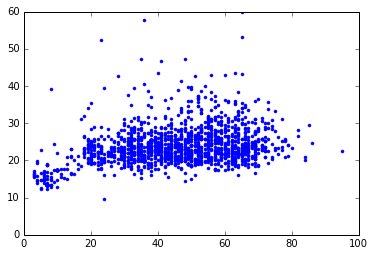

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
df_rel[["AGE_CORRECTED"]] = df_rel[["AGE_CORRECTED"]].apply(lambda x: pd.to_numeric(x, errors = "coerce"))
df_clean = df_rel.dropna()
print "shape of data:", df_clean.shape
plt.plot(df_clean.AGE_CORRECTED, df_clean.BMI_CORRECTED, '.')

In [11]:
## Keep only subset of age (say greater than 20 years old)

df_age_20 = df_clean[df_clean.AGE_CORRECTED>20]

In [12]:
y = np.array(df_age_20["BMI_CORRECTED"])
X = np.array(df_age_20.iloc[:,467:])
print "y shape", y.shape
print "X shape", X.shape

y shape (1436,)
X shape (1436, 1914)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print X_train.shape
print y_train.shape

(1292, 1914)
(1292,)


In [16]:
ENet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=10, normalize=False, 
                            max_iter=3000, tol=0.0001, cv=3, copy_X=True, n_jobs=-1)

ENET_scores =-1*cross_validation.cross_val_score(ENet, X_train, y_train, cv=10, scoring = 'mean_absolute_error')
print np.mean(ENET_scores), np.std(ENET_scores)

3.41460732621 0.22166670894


In [15]:
RF = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RF_scores = -1*cross_validation.cross_val_score(RF, X_train, y_train, cv=10, scoring = 'mean_absolute_error')
print np.mean(RF_scores), np.std(RF_scores)

3.34934652055 0.259415996966


In [17]:
KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=range(1,11)), n_jobs = -1, scoring = 'mean_absolute_error')
KNN_scores = -1*cross_validation.cross_val_score(KNN, X_train, y_train, cv=10, scoring = 'mean_absolute_error')
print np.mean(KNN_scores), np.std(KNN_scores)

3.56851981614 0.246206957151


In [19]:
FW = FeatureWeights(upper_bound=False, cvx_solver=cvx.SCS, obj_norm=2, bagged_estimate=False)

KNN = GridSearchCV(estimator=KNeighborsRegressor(), 
                   param_grid=dict(n_neighbors=range(1,11), p=[1,2]), 
                   n_jobs = 1, scoring = 'mean_absolute_error')        

metric_KNN = Pipeline([('metric', FW), ('knn', KNN)])

metric_KNN_scores =-1*cross_validation.cross_val_score(BaggingRegressor(metric_KNN,max_samples=50, bootstrap = False, 
                                                                     n_estimators=100, n_jobs = -1), 
                                                     X_train, y_train, cv=10, scoring = 'mean_absolute_error', )
print np.mean(metric_KNN_scores), np.std(metric_KNN_scores)

3.30961731143 0.21642354793


In [20]:
KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=range(1,11)), n_jobs = 1, scoring = 'mean_absolute_error')
bagged_KNN_scores = -1*cross_validation.cross_val_score(BaggingRegressor(KNN,max_samples=50, bootstrap = True, 
                                                                     n_estimators=100, n_jobs = -1), X_train, y_train, cv=10, scoring = 'mean_absolute_error')
print np.mean(bagged_KNN_scores), np.std(bagged_KNN_scores)

3.4048393477 0.232802429247


In [ ]:
FW = FeatureWeights(upper_bound=False, cvx_solver=cvx.SCS, obj_norm=2, bagged_estimate=True, num_samples=2000, niter=50)


ENet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=10, normalize=False, 
                            max_iter=1000, tol=0.0001, cv=3, copy_X=True, n_jobs=-1)

metric_ENET = Pipeline([('metric', FW), ('knn', ENet)])

metric_ENET_scores =-1*cross_validation.cross_val_score(metric_ENET, 
                                                     X_train, y_train, cv=10, scoring = 'mean_absolute_error', )
print np.mean(metric_ENET_scores), np.std(metric_ENET_scores)

In [ ]:
ENet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=10, normalize=True, 
                            max_iter=1000, tol=0.0001, cv=3, copy_X=True, n_jobs=-1)

bagged_ENET_scores =-1*cross_validation.cross_val_score(BaggingRegressor(ENet,max_samples=50, bootstrap = False, 
                                                                     n_estimators=10), 
                                                     X_train, y_train, cv=10, scoring = 'mean_absolute_error', )

print np.mean(bagged_ENET_scores), np.std(bagged_ENET_scores)

##Test on LS

In [21]:
LS_AG_df = pd.read_csv("../data/AG-LS-BMI.csv")
LS_AG_df.head()

,BMI_CORRECTED,k__Archaea.p__Crenarchaeota,k__Archaea.p__Euryarchaeota,k__Archaea.p__.Parvarchaeota.,k__Bacteria.p__,k__Bacteria.p__AD3,k__Bacteria.p__Acidobacteria,k__Bacteria.p__Actinobacteria,k__Bacteria.p__AncK6,k__Bacteria.p__Aquificae,...,k__Bacteria.p__WS4.c__.o__.f__.g__,k__Bacteria.p__ZB3.c__.o__.f__.g__,k__Bacteria.p__.Thermi..c__Deinococci.o__Deinococcales.f__Deinococcaceae.g__CM44,k__Bacteria.p__.Thermi..c__Deinococci.o__Deinococcales.f__Deinococcaceae.g__Deinococcus,k__Bacteria.p__.Thermi..c__Deinococci.o__Deinococcales.f__Trueperaceae.g__,k__Bacteria.p__.Thermi..c__Deinococci.o__Deinococcales.f__Trueperaceae.g__B.42,k__Bacteria.p__.Thermi..c__Deinococci.o__Deinococcales.f__Trueperaceae.g__Truepera,k__Bacteria.p__.Thermi..c__Deinococci.o__Thermales.f__Thermaceae.g__Meiothermus,k__Bacteria.p__.Thermi..c__Deinococci.o__Thermales.f__Thermaceae.g__Thermus,data.source
0,24.07,0.0,0.0,0,0.0,0,0.0,0.041194,0,0,...,0,0,0,0.0,0,0,0.0,0,0.0,AG
1,21.93,0.0,0.0,0,0.0,0,0.0,0.001482,0,0,...,0,0,0,0.0,0,0,0.0,0,0.0,AG
2,22.22,0.0,0.0,0,0.0,0,0.0,0.000000,0,0,...,0,0,0,0.0,0,0,0.0,0,0.0,AG
3,14.96,0.0,0.0,0,0.0,0,0.0,0.146594,0,0,...,0,0,0,0.0,0,0,0.0,0,0.0,AG
4,24.96,0.0,0.0,0,0.0,0,0.0,0.003996,0,0,...,0,0,0,0.0,0,0,0.0,0,0.0,AG


In [22]:
LS_df = LS_AG_df[LS_AG_df["data.source"] != "AG"]
print LS_df.shape

(81, 1916)


In [17]:
X.shape

(1436, 1914)

In [23]:
X_LS = np.array(LS_df.iloc[:,1:-1])
y_LS = np.array(LS_df.BMI_CORRECTED)

In [24]:
RF = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [25]:
np.mean(abs(RF.predict(X_LS)-y_LS))

3.0548878350168529

In [26]:
np.mean(abs(RF.predict(X_test)-y_test))

4.0713577892578119

In [27]:
KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=range(1,11)), n_jobs = -1, 
                   scoring = 'mean_absolute_error')
KNN.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_absolute_error',
       verbose=0)

In [28]:
np.mean(abs(KNN.predict(X_LS) - y_LS))

2.176037037037037

In [29]:
np.mean(abs(KNN.predict(X_test) - y_test))

4.1722430555555565

In [ ]:
FW = FeatureWeights(upper_bound=False, cvx_solver=cvx.CVXOPT, obj_norm=2, bagged_estimate=False)

KNN = GridSearchCV(estimator=KNeighborsRegressor(), 
                   param_grid=dict(n_neighbors=range(1,11), p=[1,2]), 
                   n_jobs = 1, scoring = 'mean_absolute_error')        

metric_KNN = Pipeline([('metric', FW), ('knn', KNN)])

Bagged_metric = BaggingRegressor(metric_KNN,max_samples=100, bootstrap = False, n_estimators=50, n_jobs= -1)
Bagged_metric.fit(X_train, y_train)

In [ ]:
np.mean(abs(y_LS-Bagged_metric.predict(X_LS)))

In [ ]:
np.mean(abs(y_test-Bagged_metric.predict(X_test)))

In [ ]:
X_train.shape

In [ ]:
df_LS_res = pd.DataFrame({"LS_RF_pred": RF.predict(X_LS), "LS_BMI": y_LS, "sample_id": LS_df["data.source"]})
df_LS_res.to_csv("meh.csv", index = False)

In [27]:
from FeatureWeightsRegressor import FeatureWeightsRegressor
FWR = FeatureWeightsRegressor(num_sample_neighbors=10, n_iter = 100)
FWR.fit(X_train, y_train)

FeatureWeightsRegressor(n_iter=100, num_sample_neighbors=10)

In [28]:
FWR.predict_tester(X_LS[45:50,:], y_LS[45:50])

****************************************
iter 0
unique rows for X_nearest (49, 1914)
optimal 1.47911111111
****************************************
iter 1
unique rows for X_nearest (49, 1914)
optimal_inaccurate 2.15066666667
****************************************
iter 2
unique rows for X_nearest (50, 1914)
optimal 2.726
****************************************
iter 3
unique rows for X_nearest (49, 1914)
optimal 1.9594
****************************************
iter 4
unique rows for X_nearest (49, 1914)
optimal 1.0994
****************************************
iter 5
unique rows for X_nearest (49, 1914)
optimal_inaccurate 2.0048
****************************************
iter 6
unique rows for X_nearest (49, 1914)
optimal_inaccurate 2.3652
****************************************
iter 7
unique rows for X_nearest (50, 1914)
optimal 2.3652
****************************************
iter 8
unique rows for X_nearest (50, 1914)
optimal 2.3652
****************************************
iter 9
unique

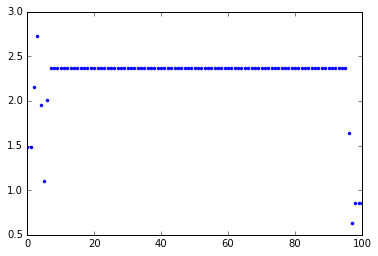

In [29]:
plt.plot(FWR.errs, ".")

In [ ]:
FWR.X_train.shape

In [ ]:
meh_res = FWR.predict(X_LS[5:10,:])

In [ ]:
np.mean(abs(y_LS[:5]-meh_res))

In [ ]:
mean_errs = []
for num_iters in range(1,110,10):
    FWR = FeatureWeightsRegressor(num_sample_neighbors=10, n_iter = num_iters)
    FWR.fit(X_train, y_train)
    meh_res = FWR.predict(X_LS[10:15,:])
    mean_errs.append(np.mean(abs(y_LS[10:15]-meh_res)))

In [ ]:
plt.plot(range(1,110,10), mean_errs)

In [ ]:
from FeatureWeightsRegressor import FeatureWeightsRegressor
FWR = FeatureWeightsRegressor(num_sample_neighbors=10, n_iter = 100)
FWR.fit(X_train, y_train)

In [ ]:
FWR.predict

In [ ]:
plt.plot(FWR.X_train_weighted[0,:], ".")

In [ ]:
plt.plot(FWR.X_train[0,:], ".")

In [ ]:
FWR.cvx_status

In [ ]:
FWR.FW.statusprob

In [ ]:
meh_ag = FWR.predict(X_test[:5,:])
np.mean(abs(y_test[:5]-meh_ag))

In [ ]:
weights = np.array(FWR.weights).squeeze()
print weights.shape

In [ ]:
plt.plot(weights[-1,:], ".")

In [ ]:
plt.plot(weights[-2,:], ".")

In [ ]:
np.mean(weights[-5:-1,:], axis = 0).shape

In [ ]:
found_weights = weights[-20,:]

non_zero_weights = found_weights[found_weights> 0]

len(non_zero_weights)

In [ ]:
plt.plot(FWR.FW.weights)

In [ ]:
plt.plot(weights[-1,:],FWR.FW.weights, ".")

In [ ]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=3)
weights_pc = pca.fit_transform(weights)    
print weights_pc.shape

In [ ]:
plt.plot(weights_pc[3:,2], ".")

In [ ]:
def find_nearest(X, X_train, y_train):
        num_neighbors = 10
        #X_train = self.X_train
        #y_train = self.y_train
        X_nearest = np.empty((0,X.shape[1]))
        y_nearest = np.empty(0)
        for i in range(X.shape[0]):
            dists = np.sum((X[i,:] - X_train)**2, axis = 1)
            print dists.shape
            X_nearest = np.vstack((X_nearest, X_train[np.argsort(dists)[:num_neighbors],:]))
            #X_nearest.append(X_train[np.argsort(dists)[:num_neighbors],:])
            X_train = np.delete(X_train, np.argsort(dists)[:num_neighbors], axis = 0)
            y_nearest = np.hstack((y_nearest, y_train[np.argsort(dists)[:num_neighbors]]))
            #y_nearest.append(y_train[np.argsort(dists)[:num_neighbors]])
            y_train = np.delete(y_train, np.argsort(dists)[:num_neighbors])
        #print len(X_nearest)
        return X_nearest, y_nearest
        #return np.array(X_nearest).squeeze(), np.array(y_nearest).squeeze()

## Age classification

In [ ]:
df_rel[["AGE_CORRECTED"]] = df_rel["AGE_CORRECTED"].apply(lambda x: pd.to_numeric(x, errors = "coerce"))
df_rel["AGE_CORRECTED"].describe()

In [ ]:
df_clean = df_rel.dropna()
print df_clean.shape

In [ ]:
y = np.array(df_clean["AGE_CORRECTED"])
X = np.array(df_clean.iloc[:,467:])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
RF = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
RF.fit(X_train, y_train)

In [ ]:
RF.score(X_train, y_train)

In [ ]:
RF.score(X_test, y_test)

In [ ]:
scores = -1*cross_validation.cross_val_score(RF, X, y, cv=5, scoring = 'mean_absolute_error')

In [ ]:
scores

In [ ]:
np.mean(scores)

In [ ]:
KNN = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=range(10,20)), n_jobs = -1, scoring = 'mean_absolute_error')
scores = -1*cross_validation.cross_val_score(KNN, X, y, cv=10, scoring = 'mean_absolute_error')
np.mean(scores)